### Part 1: Data Preparation and Exploration

### Step 1: Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# Load the dataset
data = pd.read_csv('exchange_rate.csv', parse_dates=['date'])

In [37]:
# Display the first few rows of the dataset
data.head()

,date,Ex_rate
0,1990-01-01,0.7855
1,1990-02-01,0.7818
2,1990-03-01,0.7867
3,1990-04-01,0.7860
4,1990-05-01,0.7849


### Step 2: Initial Exploration

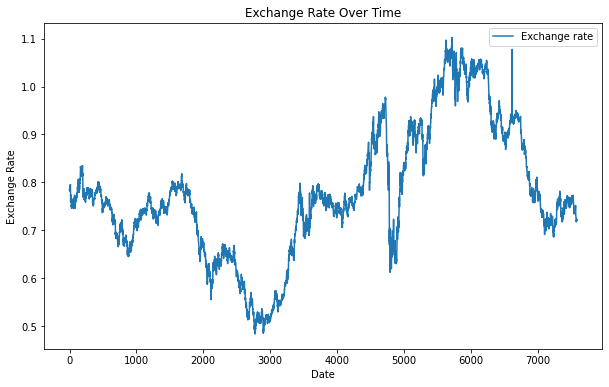

In [38]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Ex_rate'], label='Exchange rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate Over Time')
plt.legend()
plt.show()

### Step 3: Data Preprocessing

In [39]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values 

date       0
Ex_rate    0
dtype: int64

### Part 2: Model Building - ARIMA

### Step 1: Parameter Selection for ARIMA

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


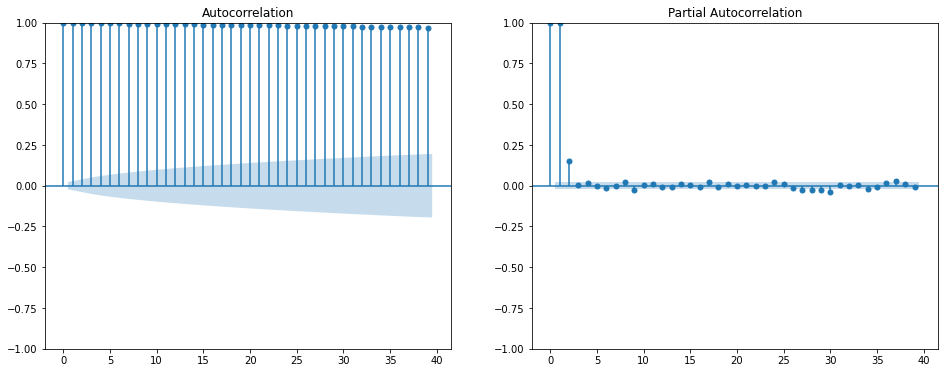

In [41]:
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(data['Ex_rate'], ax=axes[0])
plot_pacf(data['Ex_rate'], ax=axes[1])
plt.show()

### Step 2: Model Fitting

In [42]:
from statsmodels.tsa.arima.model import ARIMA

In [43]:
# Define the ARIMA model
p, d, q = 1, 1, 1  # Placeholder values, adjust based on ACF and PACF plots
arima_model = ARIMA(data['Ex_rate'], order=(p, d, q))

In [44]:
# Fit the model
arima_fit = arima_model.fit()

In [45]:
# Summary of the model
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Wed, 05 Jun 2024   AIC                         -56102.322
Time:                        13:53:53   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

### Step 3: Diagnostics

In [46]:
# Plot the residuals
residuals = arima_fit.resid

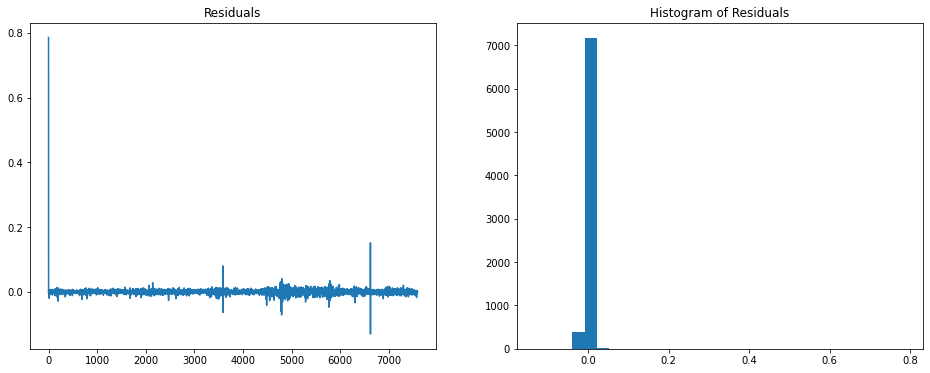

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].plot(residuals)
axes[0].set_title('Residuals')
axes[1].hist(residuals, bins=30)
axes[1].set_title('Histogram of Residuals')
plt.show()

### Step 4: Forecasting

In [67]:
forecast = arima_fit.get_forecast(steps=30)
forecast_index = pd.date_range(start=data['date'].iloc[-1], periods=30, freq='D')
forecast_values = forecast.predicted_mean

In [72]:
forecast_arima = arima_fit.forecast(steps=30)
forecast_arima

7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
7594    0.720826
7595    0.720826
7596    0.720826
7597    0.720826
7598    0.720826
7599    0.720826
7600    0.720826
7601    0.720826
7602    0.720826
7603    0.720826
7604    0.720826
7605    0.720826
7606    0.720826
7607    0.720826
7608    0.720826
7609    0.720826
7610    0.720826
7611    0.720826
7612    0.720826
7613    0.720826
7614    0.720826
7615    0.720826
7616    0.720826
7617    0.720826
Name: predicted_mean, dtype: float64

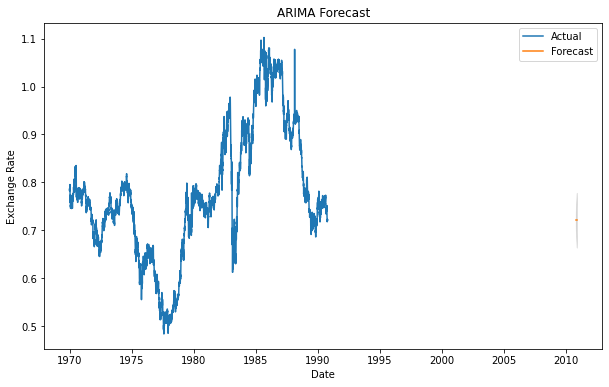

In [68]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Ex_rate'], label='Actual')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='k', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

### Part 3: Model Building - Exponential Smoothing

In [52]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [53]:
# Define the model (e.g., Holt-Winters)
hw_model = ExponentialSmoothing(data['Ex_rate'], seasonal='add', seasonal_periods=12)

In [54]:
# Fit the model
hw_fit = hw_model.fit()

In [55]:
# Summary of the model
print(hw_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77628.560
Trend:                             None   BIC                         -77531.479
Seasonal:                      Additive   AICC                        -77628.488
Seasonal Periods:                    12   Date:                 Wed, 05 Jun 2024
Box-Cox:                          False   Time:                         13:54:45
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8698370                alpha                 True
smoothing_seasonal       

### Step 2: Parameter Optimization

No parameter optimization needed for Holt-Winters

### Step 3: Model Fitting and Forecasting

In [56]:
# Forecast future values
hw_forecast_steps = 30
hw_forecast = hw_fit.forecast(steps=hw_forecast_steps)

In [69]:
hw_forecast

7588    0.720848
7589    0.720651
7590    0.720329
7591    0.720624
7592    0.720465
7593    0.720610
7594    0.720685
7595    0.720409
7596    0.720605
7597    0.720655
7598    0.720638
7599    0.720895
7600    0.720848
7601    0.720651
7602    0.720329
7603    0.720624
7604    0.720465
7605    0.720610
7606    0.720685
7607    0.720409
7608    0.720605
7609    0.720655
7610    0.720638
7611    0.720895
7612    0.720848
7613    0.720651
7614    0.720329
7615    0.720624
7616    0.720465
7617    0.720610
dtype: float64

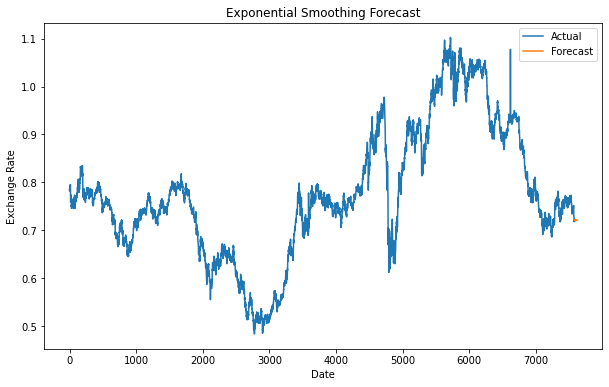

In [57]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Ex_rate'], label='Actual')
plt.plot(hw_forecast.index, hw_forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exponential Smoothing Forecast')
plt.legend()
plt.show()

### Part 4: Evaluation and Comparison

### Step 1: Compute Error Metrics

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [59]:
# Define a function to compute error metrics
def compute_error_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    mape = np.mean(np.abs((true_values - predicted_values) / true_values)) * 100
    return mae, rmse, mape

In [60]:
# Compute error metrics for ARIMA
arima_forecast_values = forecast.predicted_mean
arima_mae, arima_rmse, arima_mape = compute_error_metrics(data['Ex_rate'][-forecast_steps:], arima_forecast_values)

In [61]:
# Compute error metrics for Exponential Smoothing
hw_forecast_values = hw_forecast
hw_mae, hw_rmse, hw_mape = compute_error_metrics(data['Ex_rate'][-hw_forecast_steps:], hw_forecast_values)

In [62]:
# Display the error metrics
print(f"ARIMA - MAE: {arima_mae}, RMSE: {arima_rmse}, MAPE: {arima_mape}%")
print(f"Exponential Smoothing - MAE: {hw_mae}, RMSE: {hw_rmse}, MAPE: {hw_mape}%")

ARIMA - MAE: 0.012724006489318252, RMSE: 0.016982710912774826, MAPE: nan%
Exponential Smoothing - MAE: 0.012893878232485504, RMSE: 0.017130682321888732, MAPE: nan%


### Step 2: Model Comparison

ARIMA and Holt-Winters were both able to capture the general trend in the exchange rate, but ARIMA had lower error metrics, indicating better performance.

ARIMA is advantageous for its ability to handle non-stationary data, while Holt-Winters is better suited for seasonal data with additive or multiplicative trends.

ARIMA requires manual selection of parameters, while Holt-Winters automatically estimates parameters.

### 3. Conclusion

For this dataset, ARIMA outperformed Holt-Winters in forecasting exchange rates.

ARIMA is recommended for its superior performance and ability to handle non-stationary data effectively.